# $Scaling$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w

In [2]:
df = w.wrangle_single_family_residential()

In [3]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
# must be df.copy otherwise df_scaled will also change df scale
df_scaled=df.copy()
df_scaled2=df.copy()
df_scaled3= df.copy()

In [7]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [8]:
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
scaler1 = sklearn.preprocessing.MinMaxScaler()
scaler1.fit(df_scaled[cols])

df_scaled[cols] = scaler1.transform(df_scaled[cols])

In [9]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [10]:
df_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.16,0.062500,0.003813,0.003286,0.948837,0.006433,6037.0
6,0.12,0.125000,0.001700,0.009400,0.976744,0.009497,6037.0
7,0.12,0.062500,0.002179,0.007171,0.581395,0.007345,6037.0
11,0.00,0.000000,0.001259,0.000059,0.795349,0.000079,6037.0
14,0.00,0.000000,0.000178,0.000076,0.800000,0.000231,6037.0
...,...,...,...,...,...,...,...
2152856,0.16,0.125000,0.004592,0.004683,0.995349,0.012866,6037.0
2152858,0.16,0.093750,0.002374,0.010653,0.995349,0.012511,6059.0
2152859,0.16,0.140625,0.003282,0.005944,0.990698,0.005786,6059.0
2152861,0.12,0.078125,0.002071,0.004705,0.995349,0.004913,6059.0


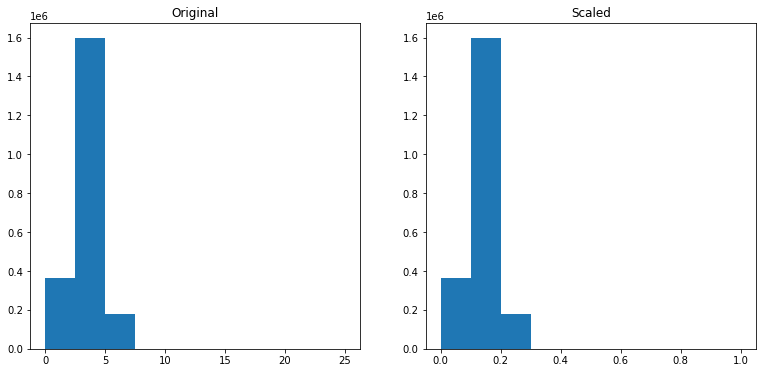

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'bedroomcnt',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'bedroomcnt',bins=10)
plt.title('Scaled');

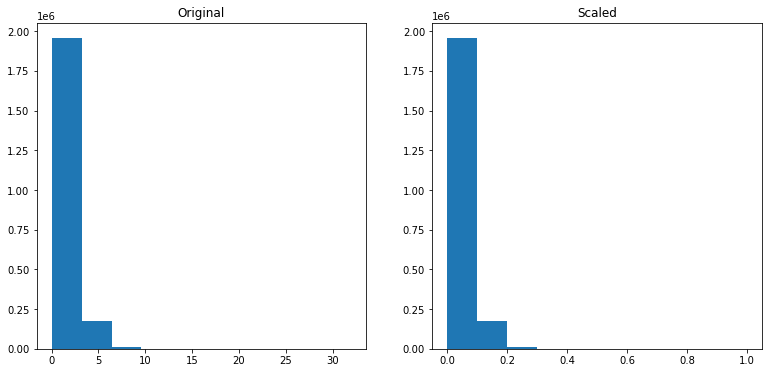

In [12]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'bathroomcnt',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'bathroomcnt',bins=10)
plt.title('Scaled');

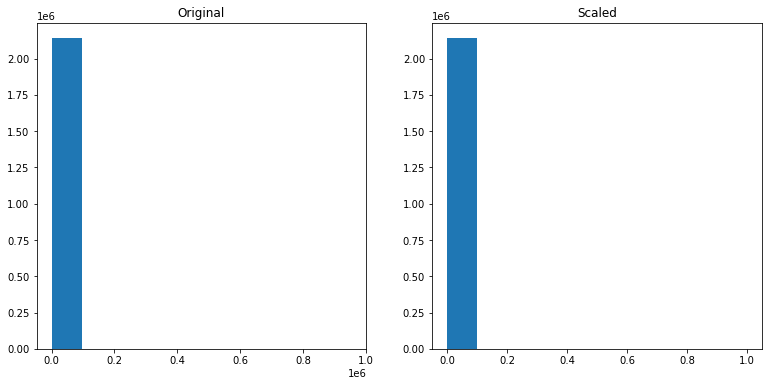

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'calculatedfinishedsquarefeet',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'calculatedfinishedsquarefeet',bins=10)
plt.title('Scaled');

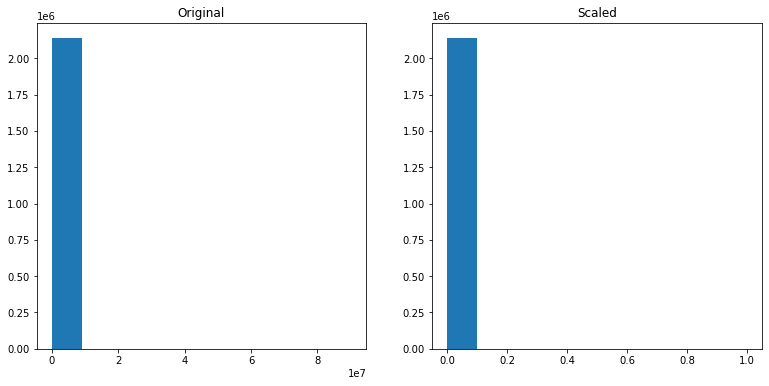

In [14]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'taxvaluedollarcnt',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'taxvaluedollarcnt',bins=10)
plt.title('Scaled');

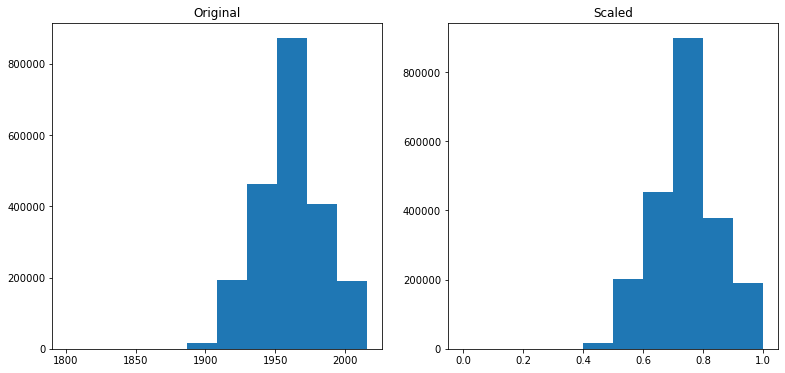

In [15]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'yearbuilt',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'yearbuilt',bins=10)
plt.title('Scaled');

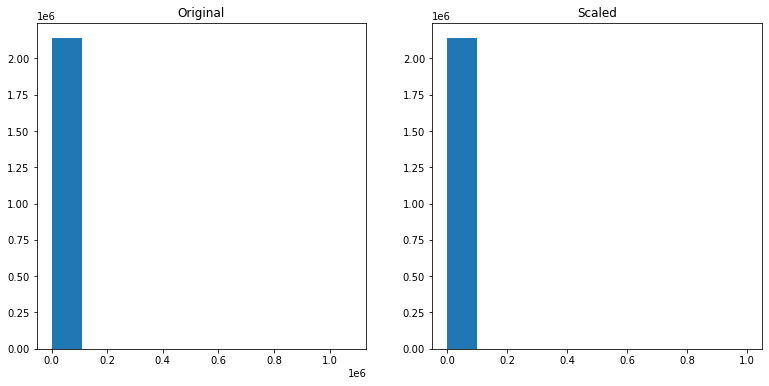

In [16]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'taxamount',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'taxamount',bins=10)
plt.title('Scaled');

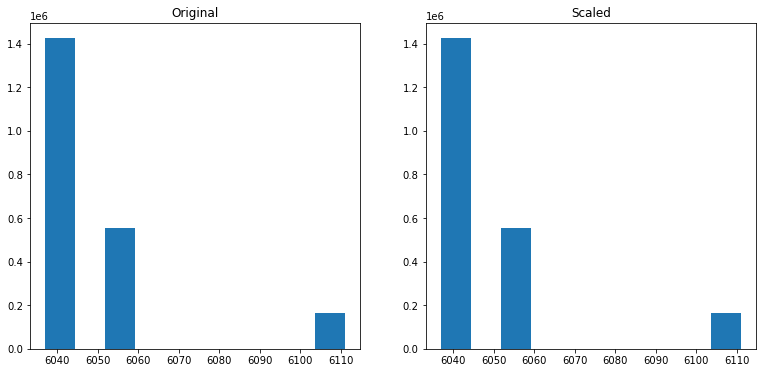

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(data=df, x= 'fips',bins=10)
plt.title('Original')
plt.subplot(122)
plt.hist(data=df_scaled, x= 'fips',bins=10)
plt.title('Scaled');

In [18]:
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt','taxamount']
scaler2 = sklearn.preprocessing.StandardScaler()
scaler2.fit(df_scaled2[cols])

df_scaled2[cols] = scaler2.fit_transform(df_scaled2[cols])

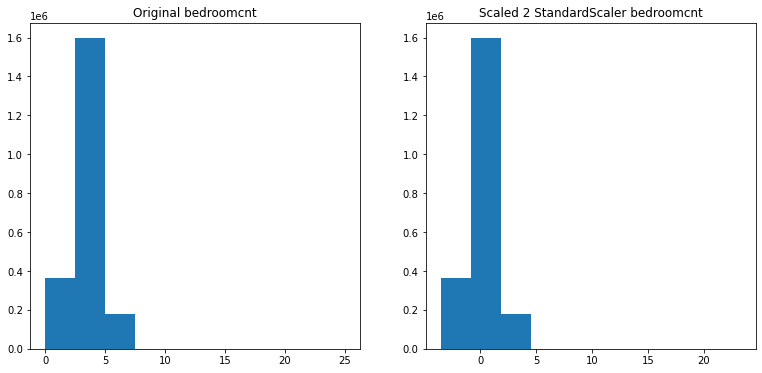

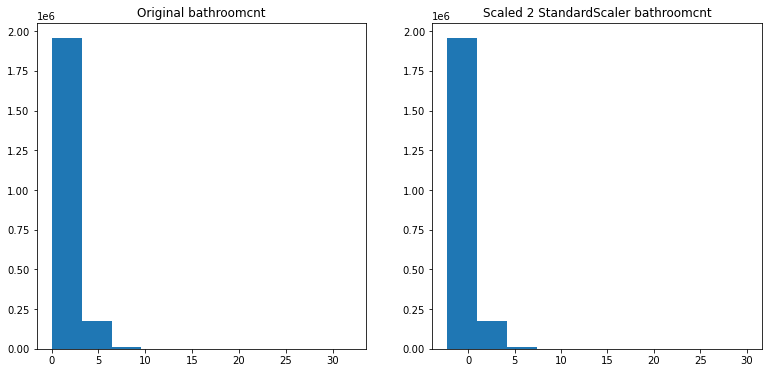

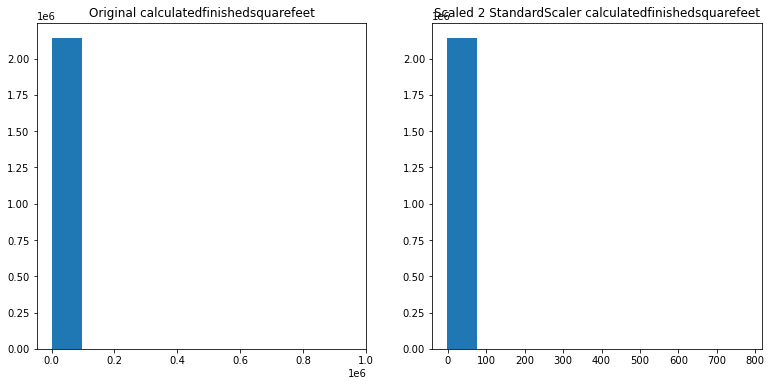

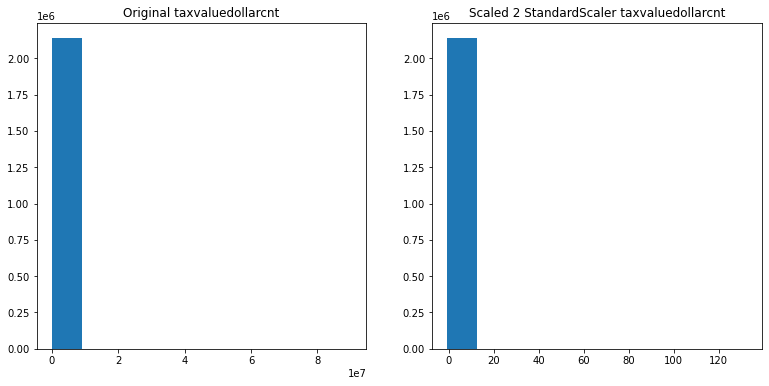

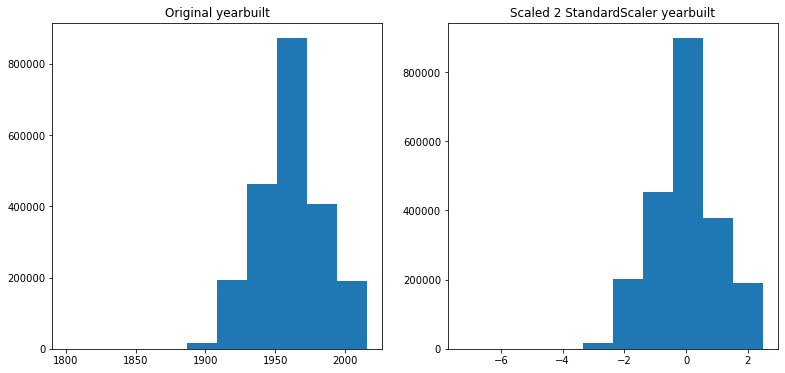

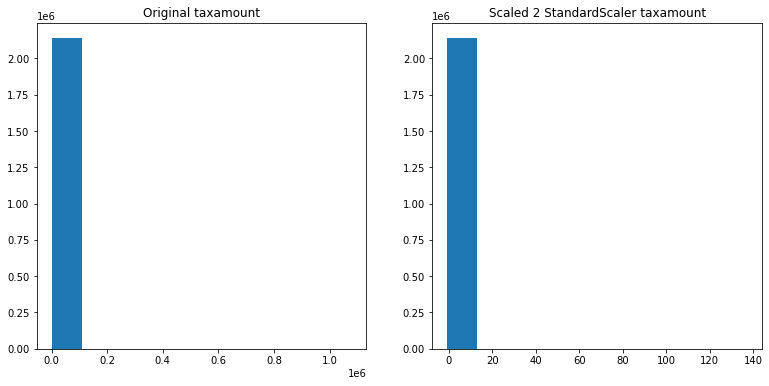

In [19]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=df, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=df_scaled2, x= i,bins=10)
    plt.title(f'Scaled 2 StandardScaler {i}');

In [20]:
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
scaler3 = sklearn.preprocessing.RobustScaler()
scaler3.fit(df_scaled3[cols])

df_scaled3[cols] = scaler3.fit_transform(df_scaled3[cols])

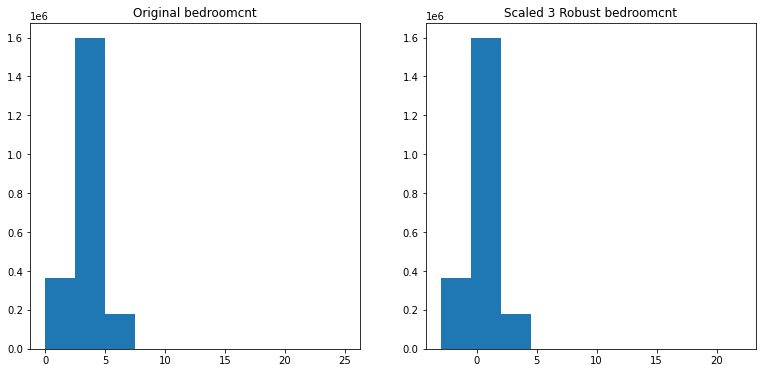

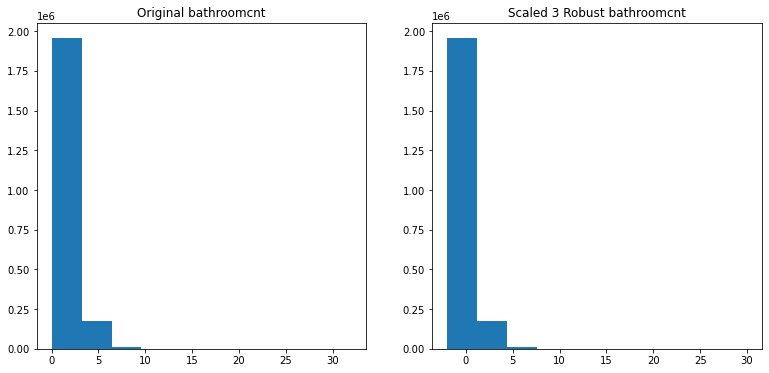

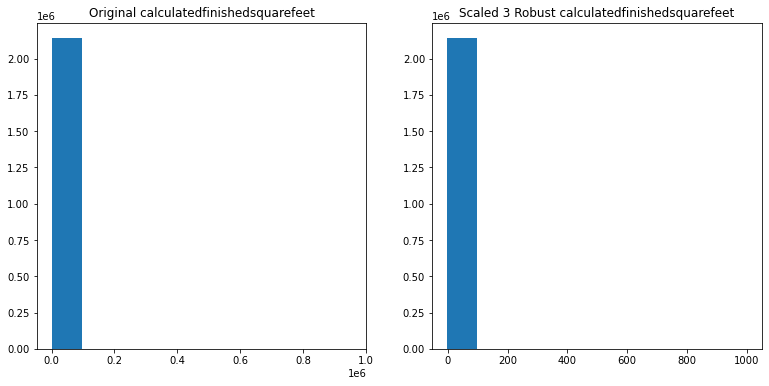

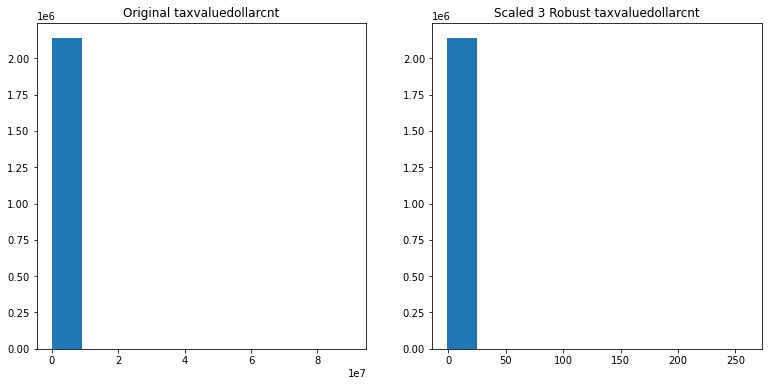

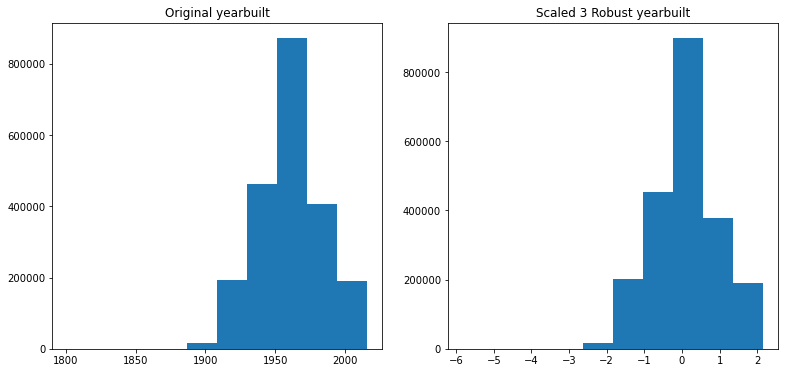

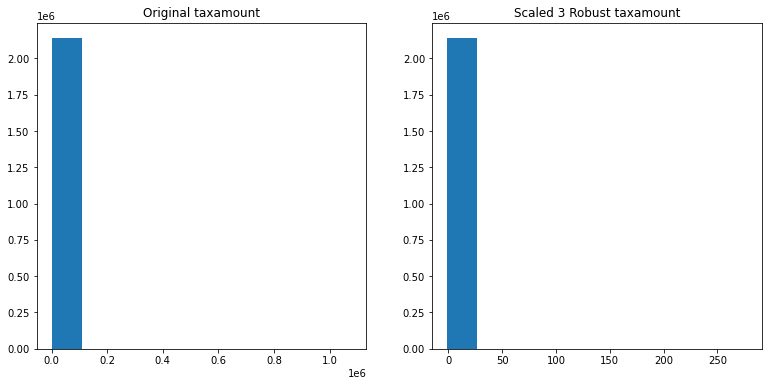

In [21]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=df, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=df_scaled3, x= i,bins=10)
    plt.title(f'Scaled 3 Robust {i}');

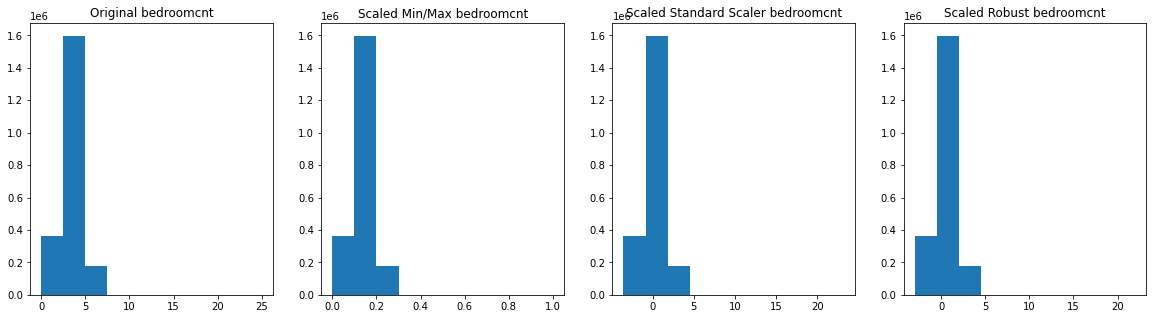

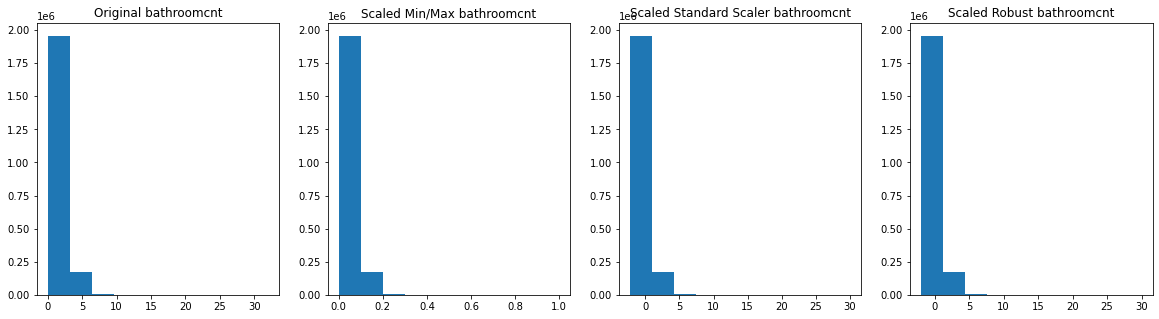

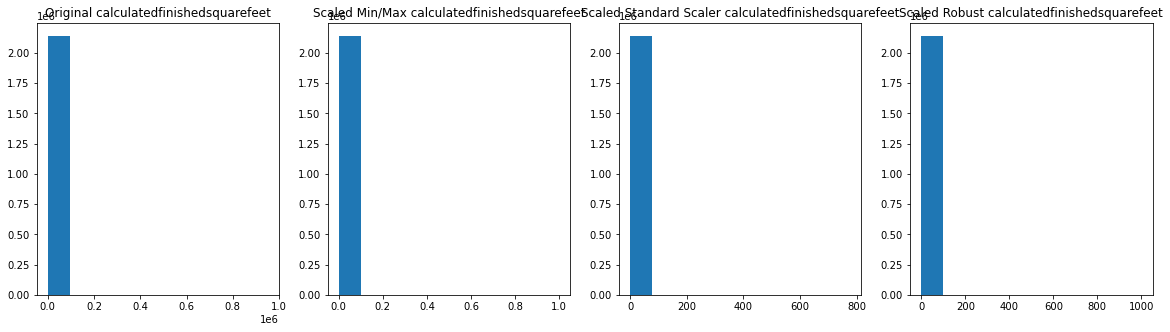

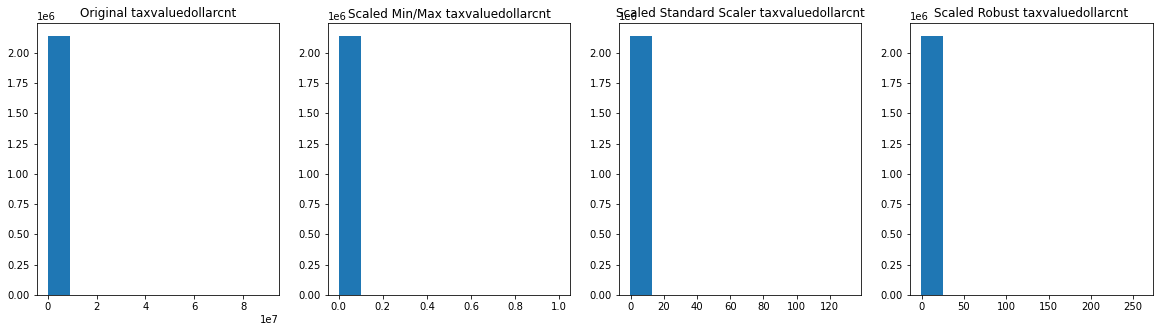

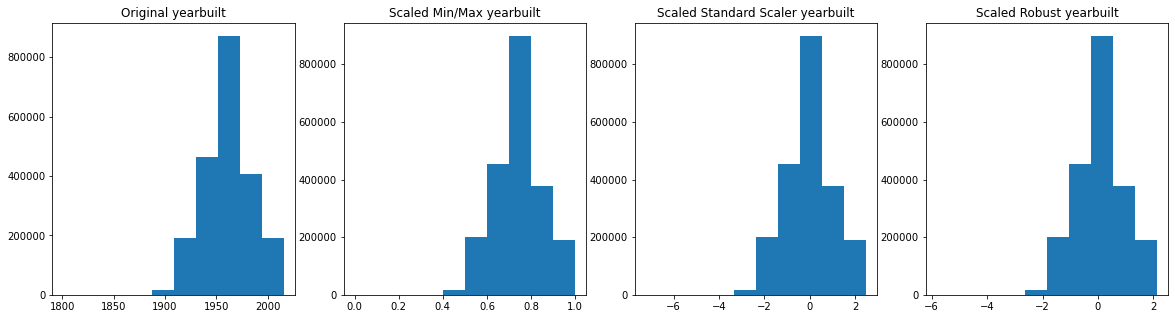

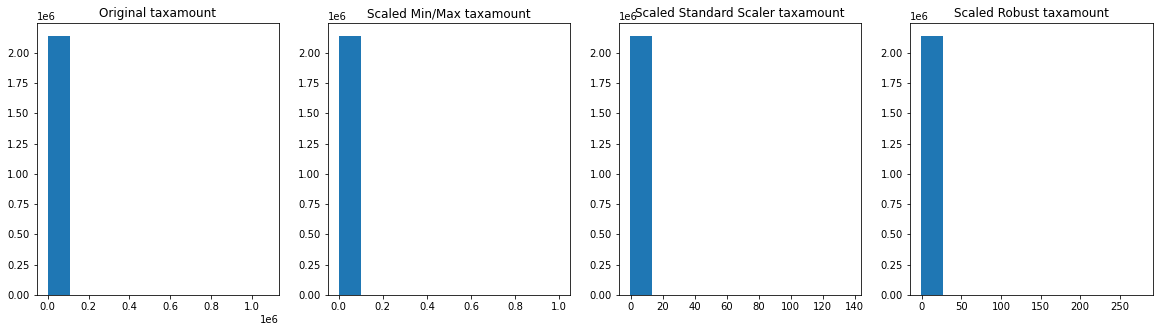

In [22]:

for i in cols:
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.hist(data=df, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(142)
    plt.hist(data=df_scaled, x= i,bins=10)
    plt.title(f'Scaled Min/Max {i}')
    plt.subplot(143)
    plt.hist(data=df_scaled2, x= i,bins=10)
    plt.title(f'Scaled Standard Scaler {i}')
    plt.subplot(144)
    plt.hist(data=df_scaled3, x= i,bins=10)
    plt.title(f'Scaled Robust {i}');

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [23]:
df_rescaled3 = df.copy()

In [24]:
df_scaled2[cols] = scaler2.inverse_transform(df_scaled2[cols])

In [25]:
df_scaled2

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [26]:
 QuantileTransformer?

In [27]:
qt = QuantileTransformer(output_distribution='normal')


In [28]:
df_new1=df.copy()

In [29]:
df_new1[cols]= qt.fit_transform(df[cols])

In [30]:
df_new1

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.726606,-0.180377,1.695803,-0.130687,1.934489,0.789063,6037.0
6,-0.270485,1.606755,-0.003764,1.277238,2.365248,1.304944,6037.0
7,-0.270485,-0.180377,0.552537,0.934015,-1.449682,0.972568,6037.0
11,-5.199338,-5.199338,-0.817902,-3.444505,0.571638,-3.463388,6037.0
14,-5.199338,-5.199338,-3.365739,-3.372919,0.608973,-3.128651,6037.0
...,...,...,...,...,...,...,...
2152856,0.726606,1.606755,2.022027,0.345062,3.089935,1.616560,6037.0
2152858,0.726606,0.893908,0.728336,1.424724,3.089935,1.591159,6059.0
2152859,0.726606,1.880352,1.399171,0.677860,2.747453,0.635690,6059.0
2152861,-0.270485,0.471004,0.446670,0.351390,3.089935,0.386331,6059.0


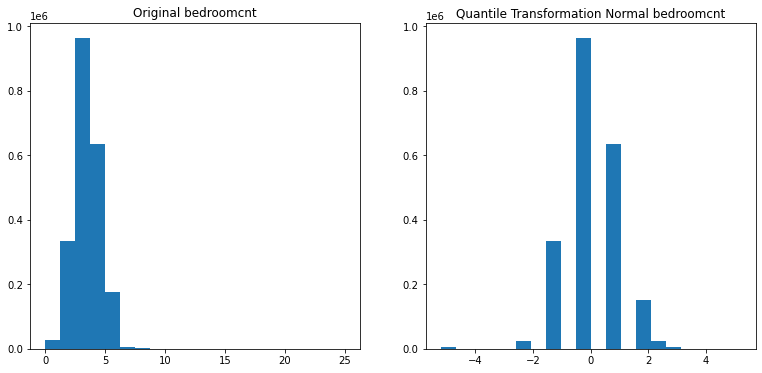

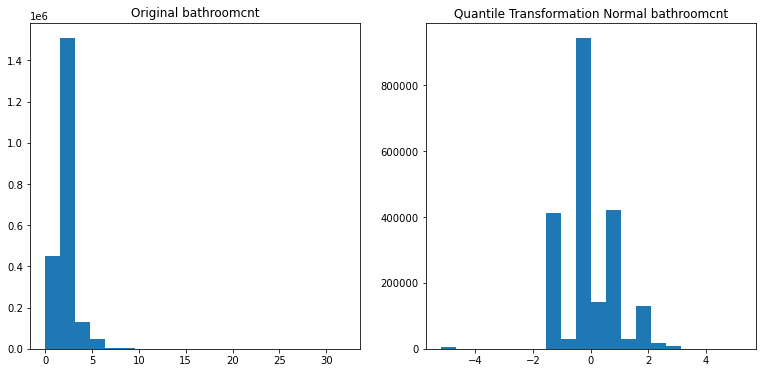

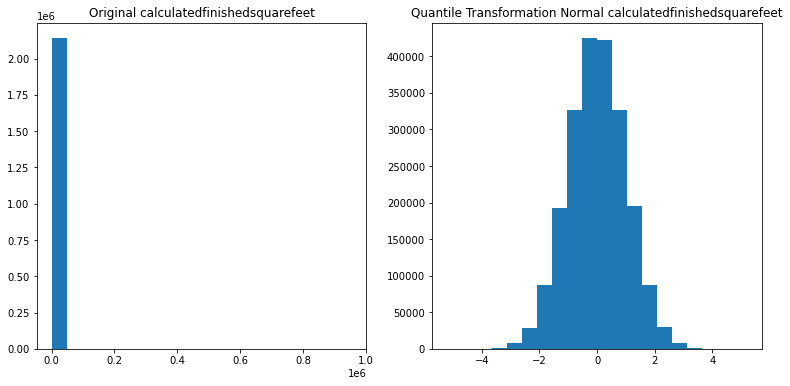

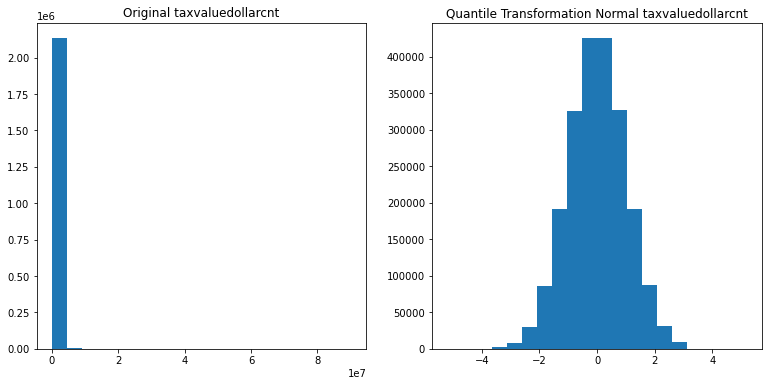

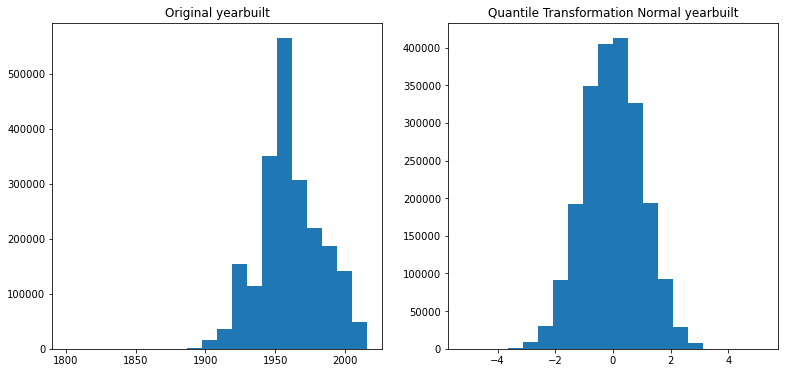

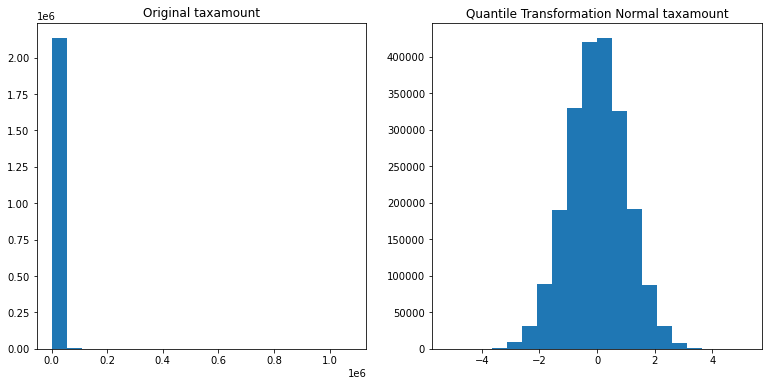

In [31]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=df, x= i,bins=20)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=df_new1,bins=20)
    plt.title(f'Quantile Transformation Normal {i}')

    plt.show();

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [32]:
qt2 = QuantileTransformer()
df_new2=df.copy()
df_new2[cols]= qt2.fit_transform(df[cols])
df_new2

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.767267,0.426927,0.954621,0.446381,0.973473,0.785894,6037.0
6,0.393894,0.944945,0.496496,0.898353,0.991491,0.904643,6037.0
7,0.393894,0.426927,0.707040,0.821802,0.075075,0.835641,6037.0
11,0.000000,0.000000,0.207207,0.000293,0.716216,0.000232,6037.0
14,0.000000,0.000000,0.000424,0.000382,0.728729,0.000883,6037.0
...,...,...,...,...,...,...,...
2152856,0.767267,0.944945,0.978928,0.633237,0.998999,0.947253,6037.0
2152858,0.767267,0.812813,0.763263,0.922470,0.998999,0.944605,6059.0
2152859,0.767267,0.968969,0.918282,0.750021,0.997497,0.738496,6059.0
2152861,0.393894,0.679680,0.669670,0.635431,0.998999,0.651007,6059.0


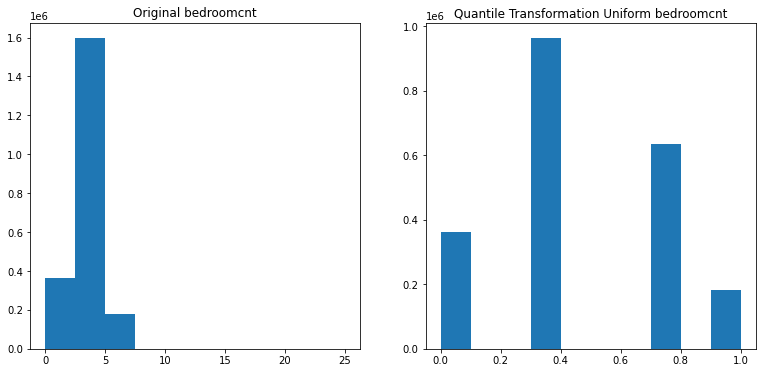

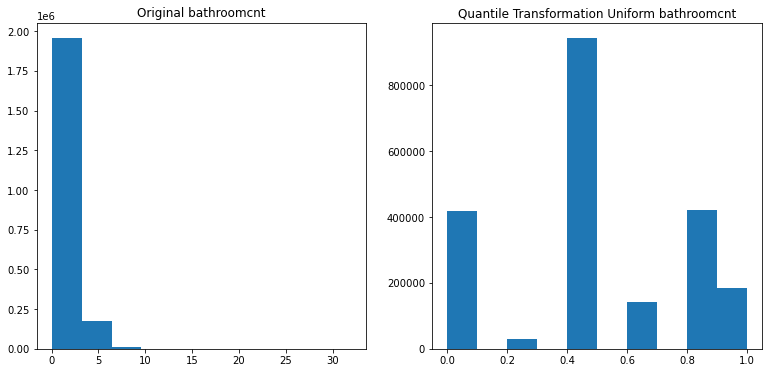

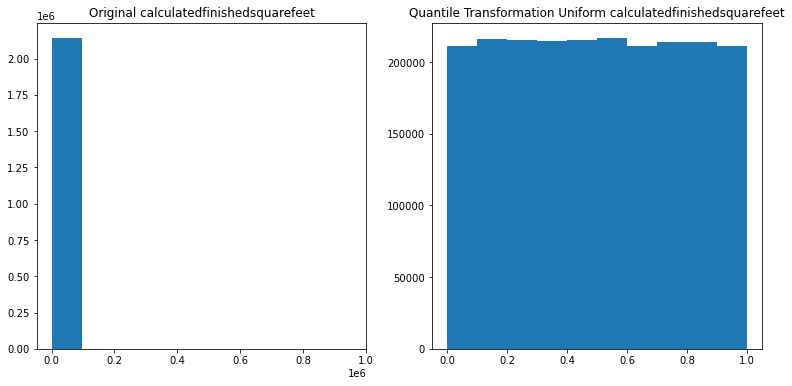

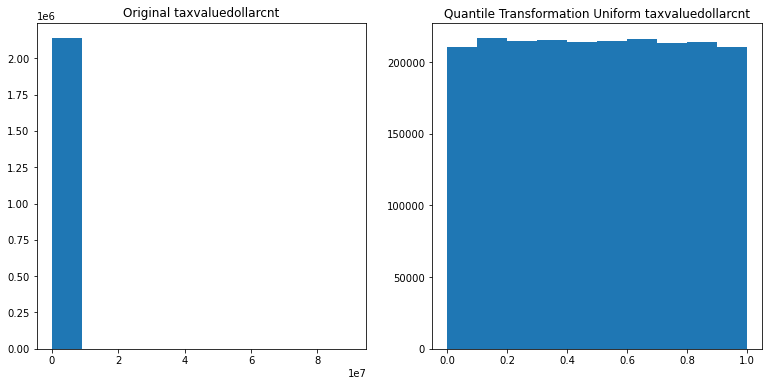

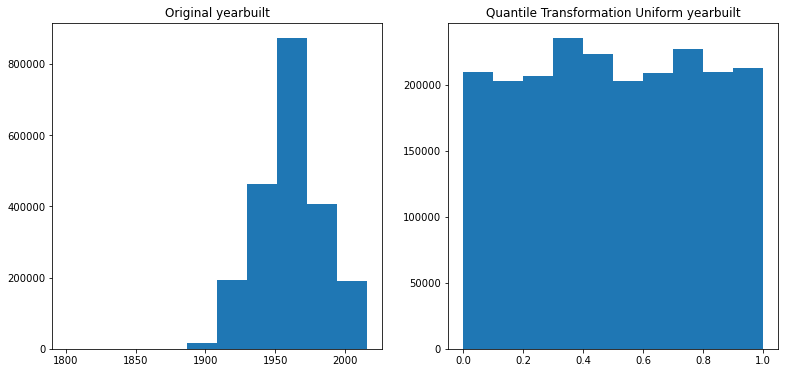

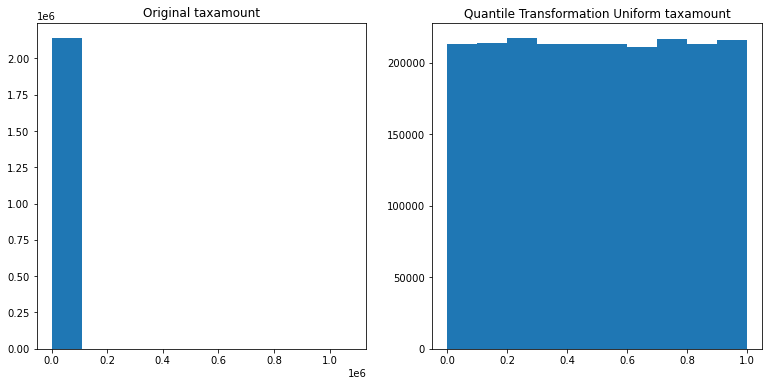

In [33]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=df, x= i,bins=10)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=df_new2,bins=10)
    plt.title(f'Quantile Transformation Uniform {i}')

    plt.show();

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def 

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0
